<center> <font size="6"> <div class="alert alert-block alert-success"> <strong> A2Z Insurance Customer Segmentation Project 
</strong> </div> </font> </center>

<center> <font size="4"> <div class="alert alert-block alert-success"> <strong> Cluster Analysis
</strong> </div> </font> </center>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from math import ceil
from matplotlib.lines import Line2D
from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar, colors as mpl_colors, __version__ as mplver
plt.rcParams['figure.dpi'] = 50

from scipy.cluster.hierarchy import dendrogram

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.manifold import TSNE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView


## Import Data

In [2]:
#import not sclaled data
dns = pd.read_csv(r'C:data_not_scaled.csv')

In [3]:
#import pre-proc dataset
df_ohc=pd.read_csv('preproc_data.csv')

df_ohc = df_ohc.rename(columns={"x0_b'2 - High School'":'High School', 
                              "x0_b'3 - BSc/MSc'":'BSc/MSc', 
                              "x0_b'4 - PhD'":'PhD', 
                              'x1_Diamond':'Diamond', 
                              'x1_Gold':'Gold', 
                              'x1_Silver':'Silver',
                              })

In [4]:
#define perspectives
demo =  df_ohc[['High School', 'BSc/MSc', 'PhD',
       'MonthSal', 'Children']].copy()

cust_val =  df_ohc[['CustMonVal','Client Tenure', 'Total Premium']].copy()

## Perspective 1: Customer Value - K-Means

In [5]:
number_clusters = 2
kmclust1 = KMeans(n_clusters=number_clusters,
                  init='k-means++',
                  n_init=15,
                  random_state=1)
km_labels1 = kmclust1.fit_predict(cust_val)
km_labels1

array([0, 1, 1, ..., 1, 0, 1])

In [6]:
df_concat1 = pd.concat(
    (cust_val, pd.Series(km_labels1, name='km_labels1', index=cust_val.index)),
    axis=1)

In [7]:
dns['cust_val'] = df_concat1['km_labels1']
df_ohc['cust_val'] = df_concat1['km_labels1']

In [8]:
dns

,Unnamed: 0,CustID,MonthSal,GeoLivArea,Children,CustMonVal,Client Tenure,Total Premium,EducDeg_BSc/MSc,EducDeg_High School,EducDeg_PhD,Customer_Category_Bronze,Customer_Category_Diamond,Customer_Category_Gold,Customer_Category_Silver,cust_val
0,0,1.0,2177.0,1.0,1.0,380.97,31.0,665.56,0,1,0,1,0,0,0,0
1,1,2.0,677.0,4.0,1.0,-131.13,21.0,910.96,0,1,0,0,0,1,0,1
2,2,3.0,2277.0,3.0,0.0,504.67,25.0,740.60,0,0,0,0,0,0,1,1
3,3,4.0,1099.0,4.0,1.0,-16.99,26.0,600.68,1,0,0,1,0,0,0,1
4,4,5.0,1763.0,4.0,1.0,35.23,30.0,629.24,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,10236,10292.0,3188.0,2.0,0.0,-0.11,32.0,641.56,0,0,1,1,0,0,0,0
10237,10237,10293.0,2431.0,3.0,0.0,1405.60,39.0,1430.60,0,0,0,0,1,0,0,0
10238,10238,10294.0,2918.0,1.0,1.0,524.10,22.0,696.24,1,0,0,1,0,0,0,1
10239,10239,10295.0,1971.0,2.0,1.0,250.05,35.0,774.92,0,0,0,0,0,0,1,0


In [9]:
dns.groupby('cust_val')['CustMonVal', 'Client Tenure','Total Premium'].describe().T.head(50)

cust_val                        0             1
CustMonVal    count   4286.000000   5955.000000
              mean     199.937182    220.433353
              std      347.934834    366.194046
              min   -14714.080000 -10198.910000
              25%      -12.672500     -6.110000
              50%      184.095000    188.150000
              75%      395.802500    402.080000
              max     1405.600000   2054.070000
Client Tenure count   4286.000000   5955.000000
              mean      34.959963     23.649202
              std        3.465667      3.308925
              min       26.400000     16.000000
              25%       32.000000     21.000000
              50%       35.000000     24.000000
              75%       38.000000     26.000000
              max       42.000000     29.400000
Total Premium count   4286.000000   5955.000000
              mean     711.846644    784.072517
              std      141.274166    215.359014
              min      407.932000    429.190000
              25%      615.560000    637.115000
              50%      679.240000    717.800000
              75%      768.750000    868.000000
              max     1490.600000   2382.000000

## Perspective 2: Customer Demography - SOM + K-Means

In [10]:
np.random.seed(42)
sm = sompy.SOMFactory().build(
    demo.values,
    mapsize=[7, 7],  
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=demo.columns)
sm.train(n_job=-1, verbose='info', train_rough_len=100, train_finetune_len=100)

 Training...
 random_initialization took: 0.000000 seconds
 Rough training...
 radius_ini: 3.000000 , radius_final: 1.000000, trainlen: 100

 epoch: 1 ---> elapsed time:  0.128000, quantization error: 1.410298

 epoch: 2 ---> elapsed time:  0.128000, quantization error: 2.022039

 epoch: 3 ---> elapsed time:  0.131000, quantization error: 1.961957

 epoch: 4 ---> elapsed time:  0.120000, quantization error: 1.936118

 epoch: 5 ---> elapsed time:  0.121000, quantization error: 1.899916

 epoch: 6 ---> elapsed time:  0.136000, quantization error: 1.890016

 epoch: 7 ---> elapsed time:  0.117000, quantization error: 1.886275

 epoch: 8 ---> elapsed time:  0.126000, quantization error: 1.880564

 epoch: 9 ---> elapsed time:  0.110000, quantization error: 1.873444

 epoch: 10 ---> elapsed time:  0.114000, quantization error: 1.867602

 epoch: 11 ---> elapsed time:  0.136000, quantization error: 1.863762

 epoch: 12 ---> elapsed time:  0.120000, quantization error: 1.859890

 epoch: 13 ---> 

 epoch: 14 ---> elapsed time:  0.120000, quantization error: 0.806398

 epoch: 15 ---> elapsed time:  0.125000, quantization error: 0.804556

 epoch: 16 ---> elapsed time:  0.137000, quantization error: 0.801657

 epoch: 17 ---> elapsed time:  0.110000, quantization error: 0.799177

 epoch: 18 ---> elapsed time:  0.140000, quantization error: 0.799098

 epoch: 19 ---> elapsed time:  0.142000, quantization error: 0.799103

 epoch: 20 ---> elapsed time:  0.123000, quantization error: 0.799099

 epoch: 21 ---> elapsed time:  0.140000, quantization error: 0.799099

 epoch: 22 ---> elapsed time:  0.137000, quantization error: 0.799099

 epoch: 23 ---> elapsed time:  0.124000, quantization error: 0.799099

 epoch: 24 ---> elapsed time:  0.135000, quantization error: 0.799099

 epoch: 25 ---> elapsed time:  0.124000, quantization error: 0.799099

 epoch: 26 ---> elapsed time:  0.147000, quantization error: 0.799099

 epoch: 27 ---> elapsed time:  0.145000, quantization error: 0.799099

 epoch

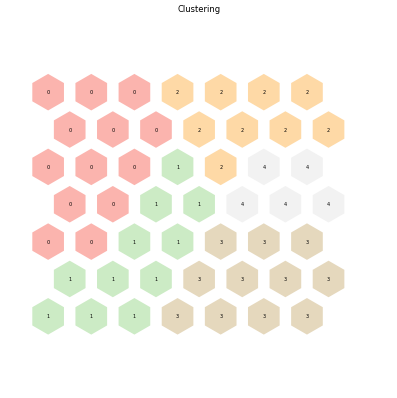

In [11]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = kmeans.fit_predict(sm.codebook.matrix)
sm.cluster_labels = nodeclus_labels 
hits = HitMapView(10, 10, "Clustering", text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

In [12]:
nodes = sm.codebook.matrix
df_nodes = pd.DataFrame(nodes, columns=demo.columns)
df_nodes['label_somkm2'] = nodeclus_labels
df_nodes

,High School,BSc/MSc,PhD,MonthSal,Children,label_somkm2
0,-0.578106,0.506304,0.355251,0.836643,-1.249194,2
1,-0.568282,-0.116557,1.632015,0.541283,-0.693667,2
2,-0.501848,-0.036712,1.341273,0.480363,-0.533474,2
3,-0.512445,0.289786,0.729137,0.337060,-0.114516,2
4,-0.613909,0.732675,0.090503,0.227492,0.353792,0
5,-0.684523,0.958593,-0.179269,0.266724,0.560943,0
6,-0.707922,1.025632,-0.245808,0.433059,0.616066,0
7,-0.266803,-0.005339,0.234590,0.816425,-1.219560,2
8,-0.311975,0.026102,0.685050,0.695388,-0.985385,2
9,-0.312641,-0.105822,1.058262,0.529321,-0.656003,2


In [13]:
bmus_map = sm.find_bmu(
    np.array(demo))[0]  
df_bmus = pd.DataFrame(np.concatenate((demo, np.expand_dims(bmus_map, 1)),
                                      axis=1),
                       index=demo.index,
                       columns=np.append(demo.columns, "BMU_somkm2"))
df_bmus

,High School,BSc/MSc,PhD,MonthSal,Children,BMU_somkm2
0,1.0,0.0,0.0,0.393345,1.0,38.0
1,1.0,0.0,0.0,0.073379,1.0,38.0
2,0.0,0.0,0.0,0.414676,0.0,17.0
3,0.0,1.0,0.0,0.163396,1.0,12.0
4,0.0,1.0,0.0,0.305034,1.0,5.0
...,...,...,...,...,...,...
10236,0.0,0.0,1.0,0.609002,0.0,10.0
10237,0.0,0.0,0.0,0.447526,0.0,17.0
10238,0.0,1.0,0.0,0.551408,1.0,6.0
10239,0.0,0.0,0.0,0.349403,1.0,25.0


In [14]:
df_demo1 = df_bmus.merge(df_nodes['label_somkm2'],
                         'left',
                         left_on="BMU_somkm2",
                         right_index=True)
df_demo1

,High School,BSc/MSc,PhD,MonthSal,Children,BMU_somkm2,label_somkm2
0,1.0,0.0,0.0,0.393345,1.0,38.0,3
1,1.0,0.0,0.0,0.073379,1.0,38.0,3
2,0.0,0.0,0.0,0.414676,0.0,17.0,1
3,0.0,1.0,0.0,0.163396,1.0,12.0,0
4,0.0,1.0,0.0,0.305034,1.0,5.0,0
...,...,...,...,...,...,...,...
10236,0.0,0.0,1.0,0.609002,0.0,10.0,2
10237,0.0,0.0,0.0,0.447526,0.0,17.0,1
10238,0.0,1.0,0.0,0.551408,1.0,6.0,0
10239,0.0,0.0,0.0,0.349403,1.0,25.0,1


In [15]:
dns['demo'] = df_demo1['label_somkm2']
df_ohc['demo'] = df_demo1['label_somkm2']
dns

,Unnamed: 0,CustID,MonthSal,GeoLivArea,Children,CustMonVal,Client Tenure,Total Premium,EducDeg_BSc/MSc,EducDeg_High School,EducDeg_PhD,Customer_Category_Bronze,Customer_Category_Diamond,Customer_Category_Gold,Customer_Category_Silver,cust_val,demo
0,0,1.0,2177.0,1.0,1.0,380.97,31.0,665.56,0,1,0,1,0,0,0,0,3
1,1,2.0,677.0,4.0,1.0,-131.13,21.0,910.96,0,1,0,0,0,1,0,1,3
2,2,3.0,2277.0,3.0,0.0,504.67,25.0,740.60,0,0,0,0,0,0,1,1,1
3,3,4.0,1099.0,4.0,1.0,-16.99,26.0,600.68,1,0,0,1,0,0,0,1,0
4,4,5.0,1763.0,4.0,1.0,35.23,30.0,629.24,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,10236,10292.0,3188.0,2.0,0.0,-0.11,32.0,641.56,0,0,1,1,0,0,0,0,2
10237,10237,10293.0,2431.0,3.0,0.0,1405.60,39.0,1430.60,0,0,0,0,1,0,0,0,1
10238,10238,10294.0,2918.0,1.0,1.0,524.10,22.0,696.24,1,0,0,1,0,0,0,1,0
10239,10239,10295.0,1971.0,2.0,1.0,250.05,35.0,774.92,0,0,0,0,0,0,1,0,1


In [16]:
dns.groupby('demo')['EducDeg_High School', 'EducDeg_BSc/MSc', 'EducDeg_PhD','MonthSal', 'Children'].describe().T.head(50)

demo                                 0            1            2            3  \
EducDeg_High School count  4803.000000  1601.000000   345.000000  2488.000000   
                    mean      0.000000     0.001874     0.000000     1.000000   
                    std       0.000000     0.043261     0.000000     0.000000   
                    min       0.000000     0.000000     0.000000     1.000000   
                    25%       0.000000     0.000000     0.000000     1.000000   
                    50%       0.000000     0.000000     0.000000     1.000000   
                    75%       0.000000     0.000000     0.000000     1.000000   
                    max       0.000000     1.000000     0.000000     1.000000   
EducDeg_BSc/MSc     count  4803.000000  1601.000000   345.000000  2488.000000   
                    mean      1.000000     0.000000     0.000000     0.000000   
                    std       0.000000     0.000000     0.000000     0.000000   
                    min       1.000000     0.000000     0.000000     0.000000   
                    25%       1.000000     0.000000     0.000000     0.000000   
                    50%       1.000000     0.000000     0.000000     0.000000   
                    75%       1.000000     0.000000     0.000000     0.000000   
                    max       1.000000     0.000000     0.000000     0.000000   
EducDeg_PhD         count  4803.000000  1601.000000   345.000000  2488.000000   
                    mean      0.000000     0.246721     0.878261     0.000000   
                    std       0.000000     0.431238     0.327459     0.000000   
                    min       0.000000     0.000000     0.000000     0.000000   
                    25%       0.000000     0.000000     1.000000     0.000000   
                    50%       0.000000     0.000000     1.000000     0.000000   
                    75%       0.000000     0.000000     1.000000     0.000000   
                    max       0.000000     1.000000     1.000000     0.000000   
MonthSal            count  4803.000000  1601.000000   345.000000  2488.000000   
                    mean   2618.284614  1958.743660  3531.335652  2196.089068   
                    std     912.698858   943.613599   668.377735   828.149539   
                    min     365.000000   333.000000  1078.000000   333.000000   
                    25%    1886.500000  1169.000000  3185.000000  1541.250000   
                    50%    2616.000000  1870.000000  3591.000000  2178.000000   
                    75%    3339.000000  2645.000000  4032.000000  2826.000000   
                    max    4995.000000  4285.000000  4872.000000  4524.000000   
Children            count  4803.000000  1601.000000   345.000000  2488.000000   
                    mean      0.708974     0.794503     0.276522     0.993730   
                    std       0.454155     0.403695     0.447148     0.077096   
                    min       0.000000     0.000000     0.000000     0.000000   
                    25%       0.000000     1.000000     0.000000     1.000000   
                    50%       1.000000     1.000000     0.000000     1.000000   
                    75%       1.000000     1.000000     1.000000     1.000000   
                    max       1.000000     1.000000     1.000000     1.000000   

demo                                 4  
EducDeg_High School count  1004.000000  
                    mean      1.000000  
                    std       0.000000  
                    min       1.000000  
                    25%       1.000000  
                    50%       1.000000  
                    75%       1.000000  
                    max       1.000000  
EducDeg_BSc/MSc     count  1004.000000  
                    mean      0.000000  
                    std       0.000000  
                    min       0.000000  
                    25%       0.000000  
                    50%       0.000000  
                    75%       0.000000  
                    ma

## Merging Perspectives

### Manual merging

In [17]:
features = [
    'High School', 'BSc/MSc', 'PhD', 'MonthSal', 'Children', 'CustMonVal',
    'Client Tenure', 'Total Premium'
]

In [18]:
df_ohc.groupby(['cust_val', 'demo'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('cust_val', 'demo', 0)

demo,0,1,2,3,4
cust_val,,,,,
0,2174,499,171,1011,431
1,2629,1102,174,1477,573


In [19]:
from sklearn.metrics import pairwise_distances
# Clusters with low frequency to be merged:
to_merge = [(0, 1), (0, 2), (0, 4), (1, 2), (1, 4)]

df_centroids = df_ohc.groupby(['cust_val', 'demo'])\
    [features].mean()

# Computing the euclidean distance matrix between the centroids
euclidean = pairwise_distances(df_centroids)
df_dists = pd.DataFrame(euclidean,
                        columns=df_centroids.index,
                        index=df_centroids.index)

# Merging each low frequency clustering (source) to the closest cluster (target)
source_target = {}
for clus in to_merge:
    if clus not in source_target.values():
        source_target[clus] = df_dists.loc[clus].sort_values().index[1]

source_target

{(0, 1): (1, 1), (0, 2): (1, 2), (0, 4): (1, 4)}

In [20]:
df_ = df_ohc.copy()

# Changing the behavior_labels and product_labels based on source_target
for source, target in source_target.items():
    mask = (df_['cust_val'] == source[0]) & (df_['demo'] == source[1])
    df_.loc[mask, 'cust_val'] = target[0]
    df_.loc[mask, 'demo'] = target[1]

# New contigency table
df_.groupby(['cust_val', 'demo'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('cust_val', 'demo', 0)

demo,0,1,2,3,4
cust_val,,,,,
0,2174.0,NaN,NaN,1011.0,NaN
1,2629.0,1601.0,345.0,1477.0,1004.0


### HC merging

In [21]:
df_centroids = df_ohc.groupby(['cust_val', 'demo'])\
    [features].mean()
df_centroids

High School  BSc/MSc       PhD  MonthSal  Children  CustMonVal  \
cust_val demo                                                                   
0        0        0.000000      1.0  0.000000  0.520795  0.695768    0.888947   
         1        0.000000      0.0  0.360721  0.462269  0.815230    0.891018   
         2        0.000000      0.0  0.923977  0.676322  0.274854    0.888457   
         3        1.000000      0.0  0.000000  0.460772  0.999011    0.889561   
         4        1.000000      0.0  0.000000  0.680326  0.000000    0.890061   
1        0        0.000000      1.0  0.000000  0.459875  0.719970    0.889473   
         1        0.002722      0.0  0.195100  0.294320  0.785299    0.893513   
         2        0.000000      0.0  0.833333  0.688143  0.278161    0.890963   
         3        1.000000      0.0  0.000000  0.354146  0.990251    0.890548   
         4        1.000000      0.0  0.000000  0.568373  0.000698    0.890687   

               Client Tenure  Total Premium  
cust_val demo                                
0        0          0.730709       0.135324  
         1          0.720364       0.164918  
         2          0.767881       0.130046  
         3          0.715309       0.157047  
         4          0.749866       0.200397  
1        0          0.315932       0.149732  
         1          0.238657       0.254378  
         2          0.293855       0.142088  
         3          0.297703       0.197731  
         4          0.292670       0.214264

In [22]:
hclust = AgglomerativeClustering(linkage='ward',
                                 affinity='euclidean',
                                 distance_threshold=0,
                                 n_clusters=None)
hclust_labels = hclust.fit_predict(df_centroids)

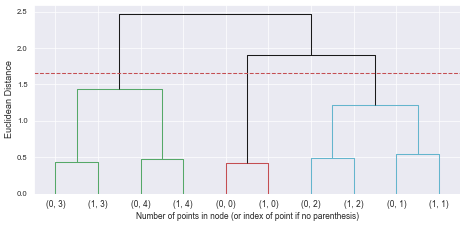

In [23]:
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack([hclust.children_, hclust.distances_,
                                  counts]).astype(float)

sns.set()
fig = plt.figure(figsize=(11, 5))
y_threshold = 1.65
dendrogram(linkage_matrix,
           truncate_mode='level',
           labels=df_centroids.index,
           p=5,
           color_threshold=y_threshold,
           above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [24]:
hclust = AgglomerativeClustering(linkage='ward',
                                 affinity='euclidean',
                                 n_clusters=3)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids

High School  BSc/MSc       PhD  MonthSal  Children  CustMonVal  \
cust_val demo                                                                   
0        0        0.000000      1.0  0.000000  0.520795  0.695768    0.888947   
         1        0.000000      0.0  0.360721  0.462269  0.815230    0.891018   
         2        0.000000      0.0  0.923977  0.676322  0.274854    0.888457   
         3        1.000000      0.0  0.000000  0.460772  0.999011    0.889561   
         4        1.000000      0.0  0.000000  0.680326  0.000000    0.890061   
1        0        0.000000      1.0  0.000000  0.459875  0.719970    0.889473   
         1        0.002722      0.0  0.195100  0.294320  0.785299    0.893513   
         2        0.000000      0.0  0.833333  0.688143  0.278161    0.890963   
         3        1.000000      0.0  0.000000  0.354146  0.990251    0.890548   
         4        1.000000      0.0  0.000000  0.568373  0.000698    0.890687   

               Client Tenure  Total Premium  hclust_labels  
cust_val demo                                               
0        0          0.730709       0.135324              2  
         1          0.720364       0.164918              1  
         2          0.767881       0.130046              1  
         3          0.715309       0.157047              0  
         4          0.749866       0.200397              0  
1        0          0.315932       0.149732              2  
         1          0.238657       0.254378              1  
         2          0.293855       0.142088              1  
         3          0.297703       0.197731              0  
         4          0.292670       0.214264              0

In [25]:
cluster_mapper = df_centroids['hclust_labels'].to_dict()
df_ = df_ohc.copy()
df_['merged_labels'] = df_.apply(lambda row: cluster_mapper[
    (row['cust_val'], row['demo'])],
                                 axis=1)
df_.groupby('merged_labels')[features].describe().T.head(60)

merged_labels                  0            1            2
High School   count  3492.000000  1946.000000  4803.000000
              mean      1.000000     0.001542     0.000000
              std       0.000000     0.039243     0.000000
              min       1.000000     0.000000     0.000000
              25%       1.000000     0.000000     0.000000
              50%       1.000000     0.000000     0.000000
              75%       1.000000     0.000000     0.000000
              max       1.000000     1.000000     0.000000
BSc/MSc       count  3492.000000  1946.000000  4803.000000
              mean      0.000000     0.000000     1.000000
              std       0.000000     0.000000     0.000000
              min       0.000000     0.000000     1.000000
              25%       0.000000     0.000000     1.000000
              50%       0.000000     0.000000     1.000000
              75%       0.000000     0.000000     1.000000
              max       0.000000     0.000000     1.000000
PhD           count  3492.000000  1946.000000  4803.000000
              mean      0.000000     0.358684     0.000000
              std       0.000000     0.479738     0.000000
              min       0.000000     0.000000     0.000000
              25%       0.000000     0.000000     0.000000
              50%       0.000000     0.000000     0.000000
              75%       0.000000     1.000000     0.000000
              max       0.000000     1.000000     0.000000
MonthSal      count  3492.000000  1946.000000  4803.000000
              mean      0.460427     0.406167     0.487450
              std       0.209682     0.230960     0.194679
              min       0.000000     0.000000     0.006826
              25%       0.284450     0.203498     0.331378
              50%       0.463311     0.393131     0.486775
              75%       0.633052     0.594870     0.641212
              max       1.000000     0.968217     0.994454
Children      count  3492.000000  1946.000000  4803.000000
              mean      0.708190     0.702775     0.709015
              std       0.454358     0.456704     0.454154
              min       0.000000     0.000000     0.000000
              25%       0.000000     0.000000     0.000000
              50%       1.000000     1.000000     1.000000
              75%       1.000000     1.000000     1.000000
              max       1.000000     1.000000     1.000000
CustMonVal    count  3492.000000  1946.000000  4803.000000
              mean      0.890225     0.892201     0.889235
              std       0.016449     0.022906     0.023760
              min       0.512772     0.357525     0.000000
              25%       0.877431     0.876662     0.876766
              50%       0.888186     0.889505     0.888961
              75%       0.900630     0.904095     0.901039
              max       0.959062     1.000000     0.952301
Client Tenure count  3492.000000  1946.000000  4803.000000
              mean      0.473590     0.413618     0.503674
              std       0.246612     0.269197     0.241349
              min       0.076923     0.000000     0.076923
              25%       0.269231     0.192308     0.307692
              50%       0.461538     0.384615     0.500000
              75%       0.653846     0.615385     0.692308
              max       1.000000     1.000000     1.000000
Total Premium count  3492.000000  1946.000000  4803.000000
              mean      0.188994     0.210473     0.143211
              std       0.096008     0.136099     0.066007
              min       0.000000     0.006439     0.037256

In [26]:
df_counts = df_.groupby('merged_labels')\
    .size()\
    .to_frame()

df_counts = df_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_counts['custval'] = df_counts['merged_labels'].apply(lambda x: x[0])
df_counts['demo'] = df_counts['merged_labels'].apply(lambda x: x[1])
df_counts.pivot('custval', 'demo', 0)

demo,0,2,4
custval,,,
1,4803,1946,3492


In [30]:
dns['merged'] = df_['merged_labels']
dns.groupby('merged')[[
    'EducDeg_High School', 'EducDeg_BSc/MSc', 'EducDeg_PhD', 'MonthSal',
    'Children', 'CustMonVal', 'Client Tenure', 'Total Premium'
]].describe().T.head(60)

merged                               0            1             2
EducDeg_High School count  3492.000000  1946.000000   4803.000000
                    mean      1.000000     0.001542      0.000000
                    std       0.000000     0.039243      0.000000
                    min       1.000000     0.000000      0.000000
                    25%       1.000000     0.000000      0.000000
                    50%       1.000000     0.000000      0.000000
                    75%       1.000000     0.000000      0.000000
                    max       1.000000     1.000000      0.000000
EducDeg_BSc/MSc     count  3492.000000  1946.000000   4803.000000
                    mean      0.000000     0.000000      1.000000
                    std       0.000000     0.000000      0.000000
                    min       0.000000     0.000000      1.000000
                    25%       0.000000     0.000000      1.000000
                    50%       0.000000     0.000000      1.000000
                    75%       0.000000     0.000000      1.000000
                    max       0.000000     0.000000      1.000000
EducDeg_PhD         count  3492.000000  1946.000000   4803.000000
                    mean      0.000000     0.358684      0.000000
                    std       0.000000     0.479738      0.000000
                    min       0.000000     0.000000      0.000000
                    25%       0.000000     0.000000      0.000000
                    50%       0.000000     0.000000      0.000000
                    75%       0.000000     1.000000      0.000000
                    max       0.000000     1.000000      0.000000
MonthSal            count  3492.000000  1946.000000   4803.000000
                    mean   2491.293414  2237.543371   2618.284614
                    std     982.906969  1082.761596    912.698858
                    min     333.000000   333.000000    365.000000
                    25%    1666.500000  1287.000000   1886.500000
                    50%    2505.000000  2176.000000   2616.000000
                    75%    3300.750000  3122.750000   3339.000000
                    max    5021.000000  4872.000000   4995.000000
Children            count  3492.000000  1946.000000   4803.000000
                    mean      0.708133     0.702672      0.708974
                    std       0.454359     0.456704      0.454155
                    min       0.000000     0.000000      0.000000
                    25%       0.000000     0.000000      0.000000
                    50%       1.000000     1.000000      1.000000
                    75%       1.000000     1.000000      1.000000
                    max       1.000000     1.000000      1.000000
CustMonVal          count  3492.000000  1946.000000   4803.000000
                    mean    213.343542   246.481182    196.744399
                    std     275.824747   384.095249    398.411209
                    min   -6115.850000 -8719.040000 -14714.080000
                    25%      -1.185000   -14.082500    -12.330000
                    50%     179.155000   201.270000    192.150000
                    75%     387.812500   445.922500    394.680000
                    max    1367.610000  2054.070000   1254.240000
Client Tenure       count  3492.000000  1946.000000   4803.000000
                    mean     28.313230    26.754060     29.093525
                    std       6.411835     6.998739      6.275332
                    min      18.000000    16.000000     18.000000
                    25%      23.000000    21.000000     24.000000
                    50%      28.000000    26.000000     29.000000
                    75%      33.000000    32.000000     34.000000
                    max      42.000000    42.000000     42.000000
Total Premium       count  3492.000000  1946.000000   4803.000000
                    mean    788.035160   830.242052    698.033883
                    std     188.697815   267.470911    129.728697
                    min     407.932000  

In [27]:
df = df_.copy()

## Cluster Visualization

In [28]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""] * len(label_columns)

    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns),
                             ncols=2,
                             figsize=figsize,
                             squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i != label]
        dfax = df.drop(drop_cols, axis=1)

        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:, [0, 1]]
        counts.columns = [label, "counts"]

        # Setting Data
        pd.plotting.parallel_coordinates(centroids,
                                         label,
                                         color=sns.color_palette(),
                                         ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(s=titl,
                       xy=(0.95, 1.1),
                       xycoords='axes fraction',
                       fontsize=13,
                       fontweight='heavy')
        ax[0].legend(handles,
                     cluster_labels)  # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)),
                        fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)),
                        fontsize=13)

    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

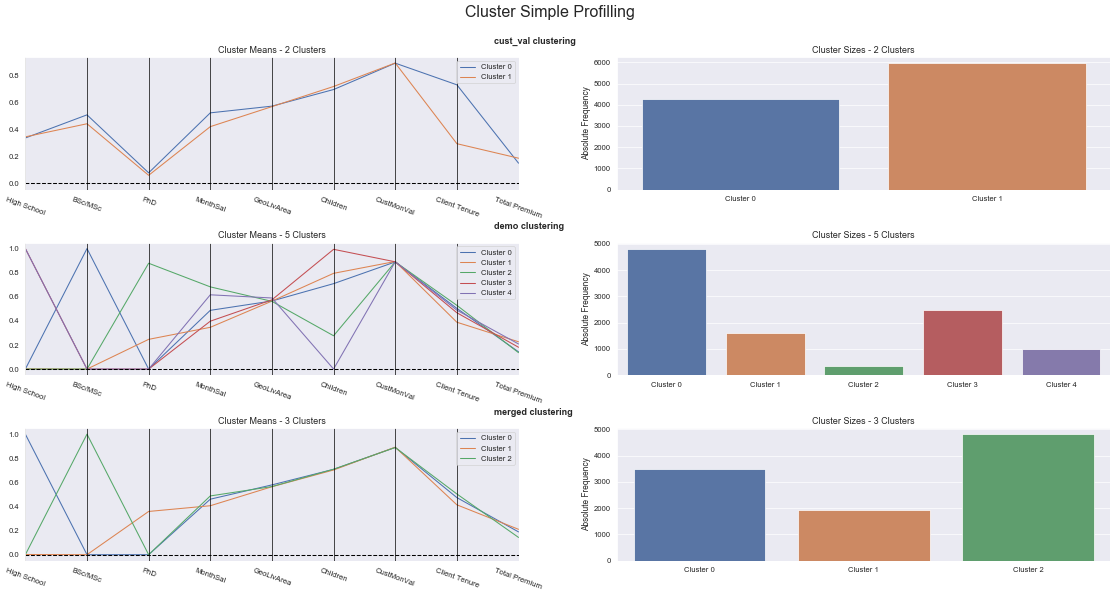

In [29]:
# Profilling each cluster (product, behavior, merged)
features = [
    'High School', 'BSc/MSc', 'PhD', 'MonthSal', 'GeoLivArea', 'Children',
    'CustMonVal', 'Client Tenure', 'Total Premium'
]
cluster_profiles(df=df[features + ['cust_val', 'demo', 'merged_labels']],
                 label_columns=['cust_val', 'demo', 'merged_labels'],
                 figsize=(28, 13),
                 compar_titles=[
                     "cust_val clustering", "demo clustering",
                     'merged clustering'
                 ])

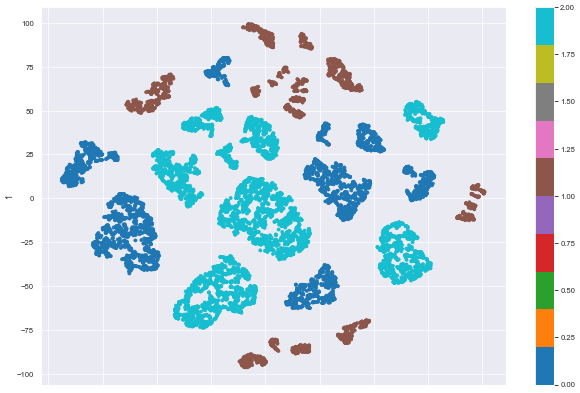

In [31]:
two_dim = TSNE(random_state=42).fit_transform(df[features])
pd.DataFrame(two_dim).plot.scatter(x=0,
                                   y=1,
                                   c=df['merged_labels'],
                                   colormap='tab10',
                                   figsize=(15, 10))
plt.show()